 <h4 style='color:green;font-size:20px'>  Neural Network <h4>

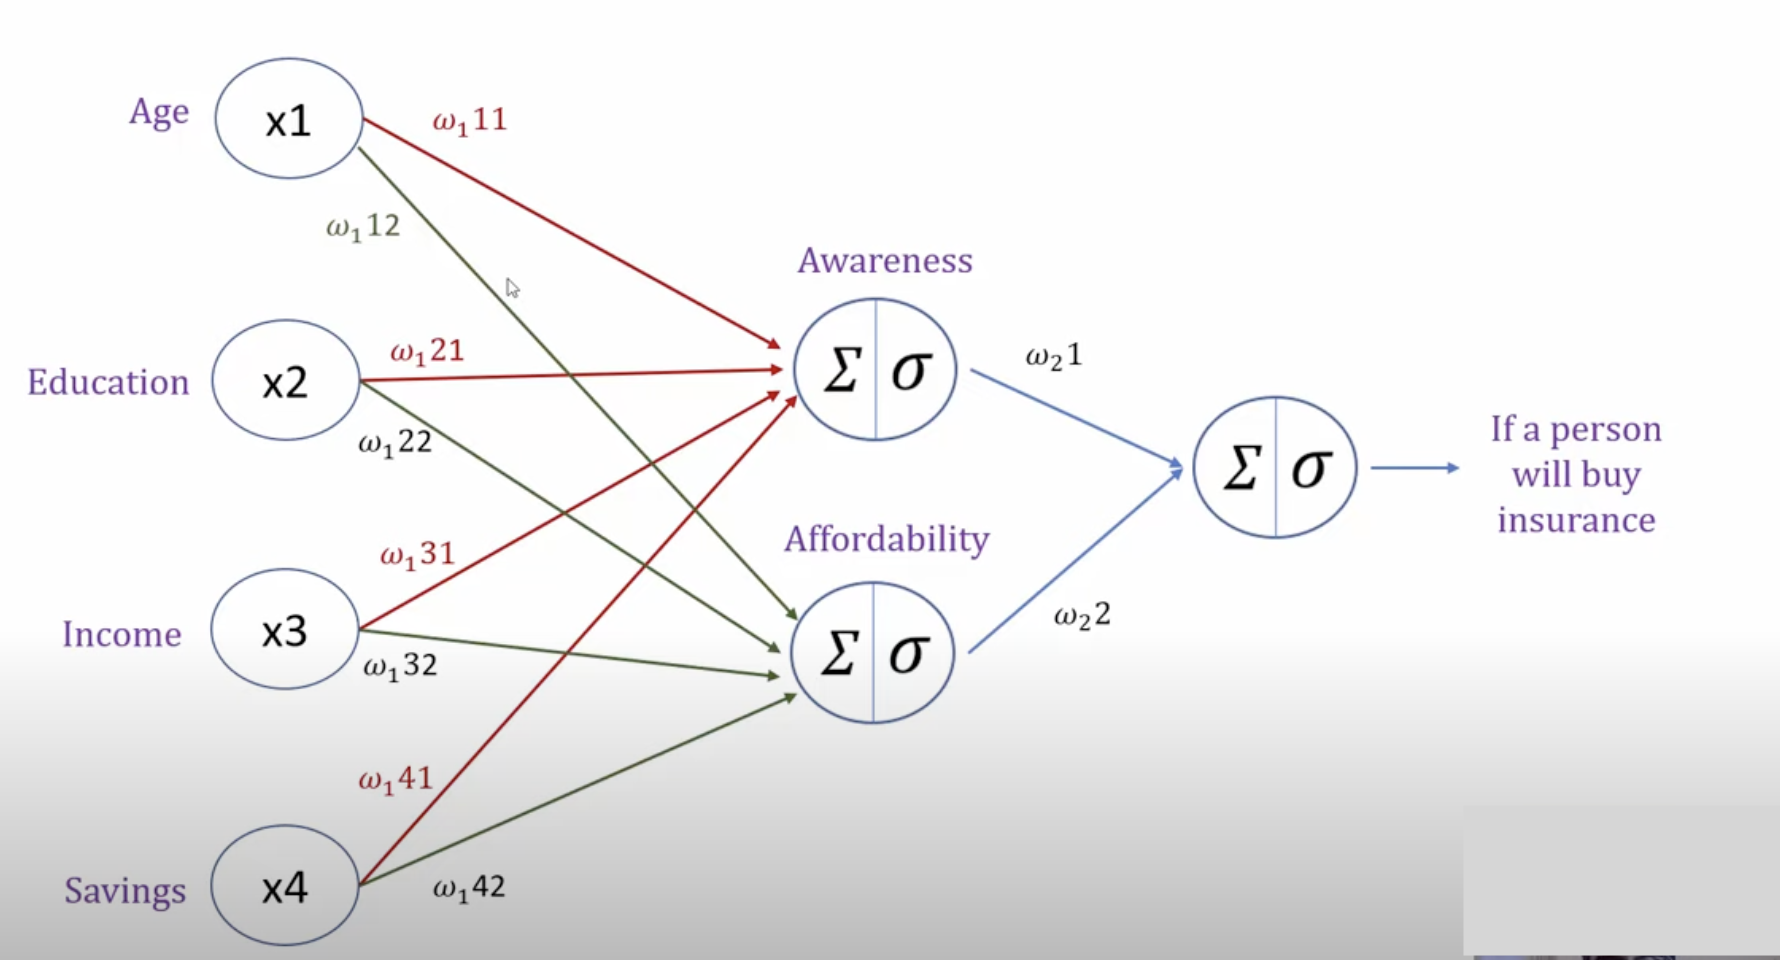

In [2]:
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,),activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])
# model.compile(
#     optimizer='adam',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# ) 
# model.fit(x_train,y_train, epochs=5)

 <h4 style='color:blue;font-size:20px'>  Activation Functions <h4>

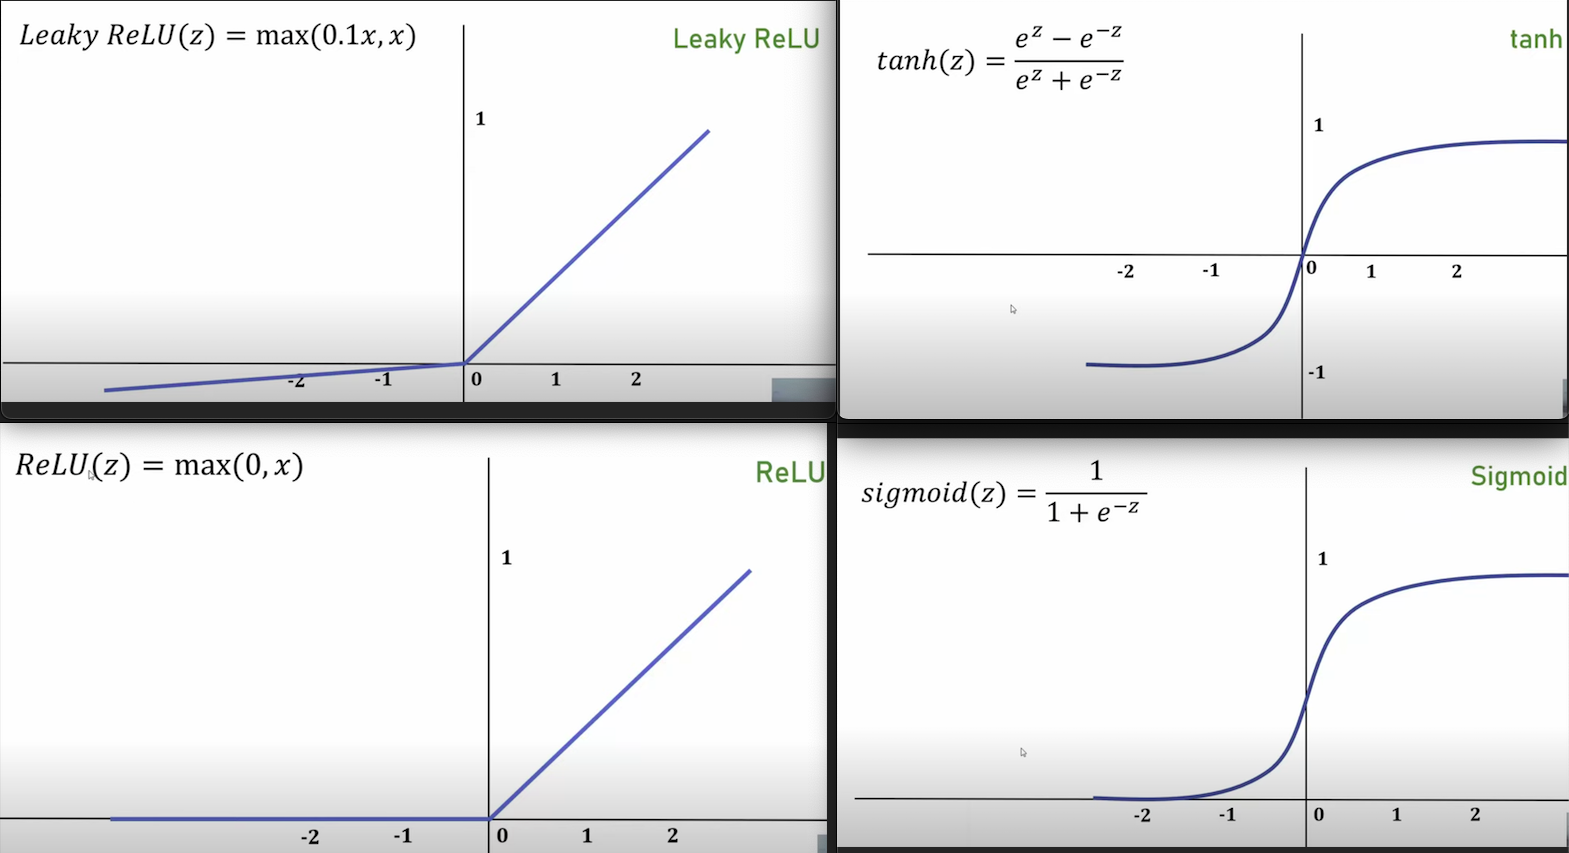

In [3]:
# Use sigmoid in output layer and all other places use tanh

In [4]:
# for hidden layers if do not know what to use just use relu

 <h4 style='color:blue;font-size:20px'>  Loss | Cost Functions <h4>

In [5]:
# Mean absolute error : (truth - Pred)
# Mean squared error : (truth - Pred)**2
# Binary cross entropy : -np.mean(truth*np.log(Pred)) + (1-truth)*np.log(Pred)

 <h4 style='color:blue;font-size:20px'>  Gradient Descent <h4>

In [6]:
import pandas as pd
df = pd.read_csv('./data/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['age','affordibility']], df['bought_insurance'], test_size=0.2, random_state=5)

In [13]:
x_train_scaled = x_train
x_train_scaled['age'] = x_train_scaled['age']/100
x_test_scaled = x_test
x_test_scaled['age'] = x_test_scaled['age']/100

In [20]:
def Sigmoid(x):
    import math
    return 1/(1+math.exp(-x))

In [21]:
def log_loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean((y_true*np.log(y_predicted_new))+(1- y_true)*np.log(1-y_predicted_new))

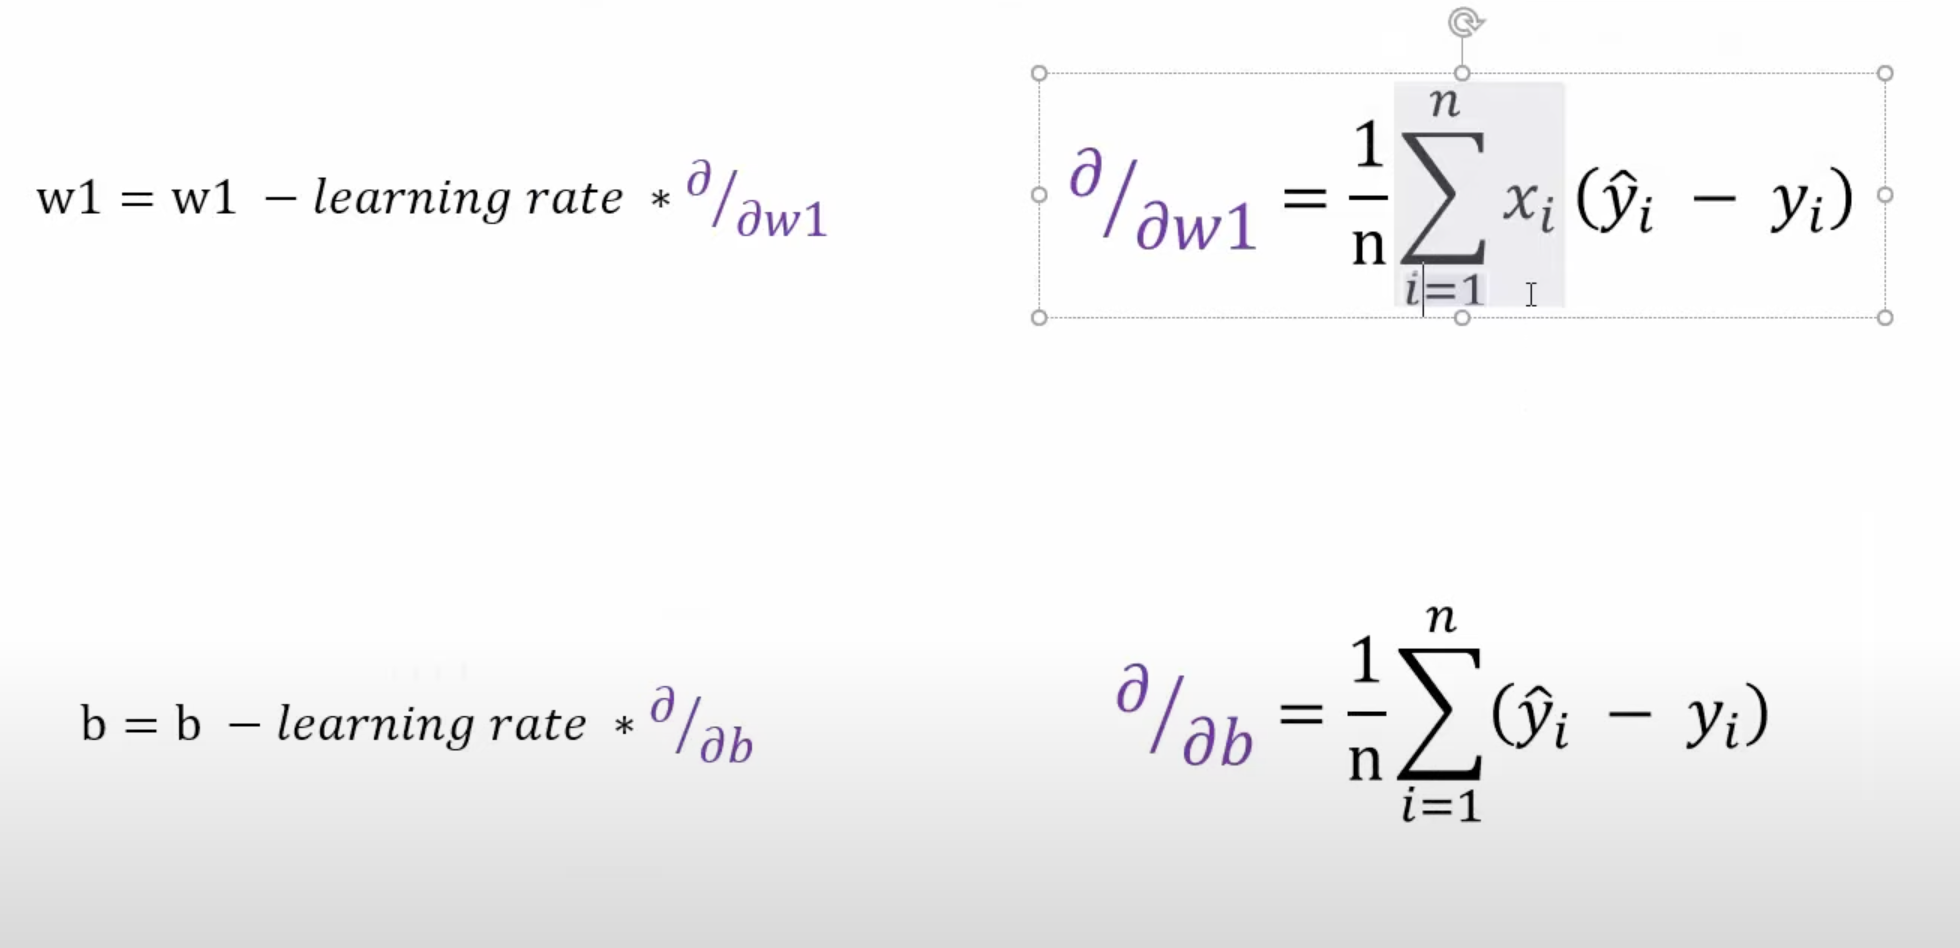

In [22]:
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
    # we are going to find w1,w2 and bias
    w1=w2=1
    bias=0
    rate = 0.5
    n = len(age)
    
    for i in range(epochs):
        weighted_sum = w1*age + w2*affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true,y_predicted)
        w1derivative = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2derivative = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
        bias_derivative = np.mean(y_predicted-y_true)
        
        w1 = w1-rate*w1derivative
        w2 = w2 - rate*w2derivative
        bias = bias - rate * bias_derivative
        
        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        
        if loss<=loss_threshold:
            break
    return w1,w2,bias

In [23]:
# NN from scratch
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
    
    def fit(self, x, y, epochs, loss_threshold):
        self.w1, self.w2, self.bias =  self.gradient_descent(x['age'], x['affordibility'], y, epochs, loss_threshold)
    
    def predict(self, x):
        weighted_sum = self.w1*x['age'] + self.w2*x['affordibility'] + self.bias
        return self.sigmoid_numpy(weighted_sum)
        
    
    def sigmoid_numpy(self, x):
        import numpy as np
        return 1/(1+np.exp(-x))
    
    def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold):
        # we are going to find w1,w2 and bias
        w1=w2=1
        bias=0
        rate = 0.5
        n = len(age)
    
        for i in range(epochs):
            weighted_sum = w1*age + w2*affordibility + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true,y_predicted)
            w1derivative = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2derivative = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))
            bias_derivative = np.mean(y_predicted-y_true)

            w1 = w1-rate*w1derivative
            w2 = w2 - rate*w2derivative
            bias = bias - rate * bias_derivative

            print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_threshold:
                break
        return w1,w2,bias

In [ ]:
# Batch Gradient Descent : Whole data set and change weights
# Mini Batch Gradient descent
# Stochastic Gradient Descent : 1 row and change weights

 <h4 style='color:blue;font-size:20px'>  GPU Usage <h4>

In [24]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# with tf.device('/GPU:0')
#     model.fit(x,y,epochs=5)